# Introduction To Scikit learn

In [2]:
what_were_covering = [
    '0. End to end scikit learn',
    '1. Get the data ready',
    '2. Choosee the right estimator for our problems',
    '3. Fit the model and use it to make predictiobs on our data',
    '4. Evaluating a model',
    '5. Improve a model',
    '6. Save and load a trained model',
    '7. Put it all together!',
]

In [3]:
# Standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [4]:

heart_disease = pd.read_csv('../data/heart-disease.csv')
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
# Create x (features matrix)
x = heart_disease.drop('target',axis=1)

# Create Y (Labels)
y = heart_disease['target']

In [6]:
# 2. Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)

# We'll keep the default hypterparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [7]:
# 3. Fit the model to the training data
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test = tts(x,y,test_size=0.2) # 20% of the data will be test

In [8]:
clf.fit(x_train,y_train)

RandomForestClassifier()

In [9]:
# make a pridiction
y_preds = clf.predict(x_test)
y_preds

array([1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0], dtype=int64)

In [10]:
y_test

98     1
168    0
74     1
61     1
187    0
      ..
128    1
298    0
295    0
106    1
291    0
Name: target, Length: 61, dtype: int64

In [11]:
# 4. Evaluate the model
clf.score(x_train,y_train)

1.0

In [12]:
clf.score(x_test,y_test)

0.8688524590163934

In [13]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85        25
           1       0.94      0.83      0.88        36

    accuracy                           0.87        61
   macro avg       0.87      0.88      0.87        61
weighted avg       0.88      0.87      0.87        61



In [14]:
confusion_matrix(y_test,y_preds)

array([[23,  2],
       [ 6, 30]], dtype=int64)

In [15]:
accuracy_score(y_test,y_preds)

0.8688524590163934

In [16]:
# 5. Improve a model 
# try different amount of n_estimators
np.random.seed(42)
for i in range(10,110,10):
    print(f'Trying model with {i} estimators..')
    clf = RandomForestClassifier(n_estimators=i).fit(x_train , y_train)
    print(f'Model accuracy on test set: {clf.score(x_test,y_test) * 100:.2f}%')
    print('---------')

Trying model with 10 estimators..
Model accuracy on test set: 81.97%
---------
Trying model with 20 estimators..
Model accuracy on test set: 85.25%
---------
Trying model with 30 estimators..
Model accuracy on test set: 81.97%
---------
Trying model with 40 estimators..
Model accuracy on test set: 81.97%
---------
Trying model with 50 estimators..
Model accuracy on test set: 83.61%
---------
Trying model with 60 estimators..
Model accuracy on test set: 81.97%
---------
Trying model with 70 estimators..
Model accuracy on test set: 83.61%
---------
Trying model with 80 estimators..
Model accuracy on test set: 83.61%
---------
Trying model with 90 estimators..
Model accuracy on test set: 85.25%
---------
Trying model with 100 estimators..
Model accuracy on test set: 85.25%
---------


In [17]:
# 6. Save a model and load it 
import pickle
pickle.dump(clf,open('random_forest_model_1.pkl','wb'))

In [18]:
loaded_model = pickle.load(open('random_forest_model_1.pkl','rb'))
loaded_model.score(x_test,y_test)

0.8524590163934426

# 1. getting our data ready to be used with machine learning

Three main things we have to do:
1. split data into features and labels ('x','y')
2. fitting or droping missing values
3. Converting non numerical values to numerical


In [19]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
x = heart_disease.drop('target', axis=1)
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [21]:
y = heart_disease['target']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [22]:
# split data into training and test sets
x_train , x_test , y_train, y_test = tts(x,y,test_size=0.2)

In [23]:
x_train.shape, x_test.shape,y_train.shape,y_test.shape

((242, 13), (61, 13), (242,), (61,))

### 1.1 Make sure it is all numerical

In [24]:
car_sales = pd.read_csv('../data/car-sales-extended.csv')
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [25]:
len(car_sales)

1000

In [26]:
# split the data
x = car_sales.drop('Price',axis=1)
y = car_sales['Price']

# split into training and test
x_train , x_test, y_train, y_test = tts(x, y, test_size=0.2)

In [27]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make','Colour','Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                                  one_hot,
                                  categorical_features)],
                                  remainder='passthrough')

transformed_x = transformer.fit_transform(x)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [28]:
pd.DataFrame(transformed_x)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [29]:
x.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [30]:
dummies = pd.get_dummies(car_sales[['Make','Colour','Doors']])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,False,True,False,False,False,False,False,False,True
1,5,True,False,False,False,False,True,False,False,False
2,4,False,True,False,False,False,False,False,False,True
3,4,False,False,False,True,False,False,False,False,True
4,3,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,4,False,False,False,True,True,False,False,False,False
996,3,False,False,True,False,False,False,False,False,True
997,4,False,False,True,False,False,True,False,False,False
998,4,False,True,False,False,False,False,False,False,True


### 1.2 Handle missing vales 
1. Fill them with some value
2. Remove the samples with missing data
    

In [31]:
car_sales_missing = pd.read_csv('../data/car-sales-extended-missing-data.csv')
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [32]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

#### Option 1. Fill missing data with pandas

In [33]:
# Fill the NaN columns
car_sales_missing.fillna({'make':'missing'},inplace=True)
car_sales_missing.fillna({'Colour': 'missing'},inplace=True)
car_sales_missing.fillna({'Odometer (KM)' : car_sales_missing['Odometer (KM)'].mean()},inplace=True)
car_sales_missing.fillna({'Doors':4},inplace=True)

In [34]:
car_sales_missing.isna().sum()

Make             49
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [35]:
# remove rows with missing price
car_sales_missing.dropna(inplace = True)

In [36]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [37]:
# Let's try convert to numbers
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make','Colour','Doors']

x_missing = car_sales_missing.drop('Price',axis=1)
x_missing = car_sales_missing['Price']

one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                                  one_hot,
                                  categorical_features)],
                                  remainder='passthrough')

transformed_x = transformer.fit_transform(car_sales_missing)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

In [38]:
car_sales_missing = pd.read_csv('../data/car-sales-extended-missing-data.csv')

In [39]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [40]:
car_sales_missing.dropna(subset=['Price'], inplace= True)

In [41]:
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [42]:
# split into x and y
x = car_sales_missing.drop('Price', axis=1)
y = car_sales_missing['Price']

# Split data into train and test
np.random.seed(42)
X_train, X_test, y_train, y_test = tts(
                                        x,
                                        y,
                                        test_size=0.2)

In [43]:
## Option 2. Fill missing values with scikit learn

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing' & numerical values with mean
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# Define columns
cat_features = ["Make", "Colour"]
door_feature = ["Doors"]
num_features = ["Odometer (KM)"]

# Create an imputer (something that fills missing data)
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_feature),
    ("num_imputer", num_imputer, num_features)
])

# Fill train and test values separately
filled_X_train = imputer.fit_transform(X_train) # fit_transform imputes the missing values from the training set and fills them simultaneously
filled_X_test = imputer.transform(X_test) # tranform takes the imputing missing values from the training set and fills the test set with them

# Check filled X_train
filled_X_train

array([['Honda', 'White', 4.0, 71934.0],
       ['Toyota', 'Red', 4.0, 162665.0],
       ['Honda', 'White', 4.0, 42844.0],
       ...,
       ['Toyota', 'White', 4.0, 196225.0],
       ['Honda', 'Blue', 4.0, 133117.0],
       ['Honda', 'missing', 4.0, 150582.0]], dtype=object)

In [44]:
# Get our transformed data array's back into DataFrame's
car_sales_filled_train = pd.DataFrame(filled_X_train, 
                                      columns=["Make", "Colour", "Doors", "Odometer (KM)"])

car_sales_filled_test = pd.DataFrame(filled_X_test, 
                                     columns=["Make", "Colour", "Doors", "Odometer (KM)"])

# Check missing data in training set
car_sales_filled_train.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [45]:
# Check missing data in test set
car_sales_filled_test.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [46]:
# Check to see the original... still missing values
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [47]:
#Import OneHotEncoder class from sklearn
from sklearn.preprocessing import OneHotEncoder

# Now let's one hot encode the features with the same code as before 
categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                 one_hot, 
                                 categorical_features)],
                                 remainder="passthrough")

# Fill train and test values separately
transformed_X_train = transformer.fit_transform(car_sales_filled_train) # fit and transform the training data
transformed_X_test = transformer.transform(car_sales_filled_test) # transform the test data

# Check transformed and filled X_train
transformed_X_train.toarray()

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 7.19340e+04],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.62665e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 4.28440e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.96225e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.33117e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.50582e+05]])

In [48]:
# Now we've transformed X, let's see if we can fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor

# Setup model
model = RandomForestRegressor()

# Make sure to use transformed (filled and one-hot encoded X data)
model.fit(transformed_X_train, y_train)
model.score(transformed_X_test, y_test)

0.21229043336119102

In [49]:
# Get california housing 
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [50]:
housing_df = pd.DataFrame(housing['data'], columns= housing['feature_names'])
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [51]:
housing_df['MedHouseVal'] = housing['target']
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [52]:
housing_df['target'] = housing['target']
housing_df = housing_df.drop('MedHouseVal',axis=1)
housing_df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [53]:
# import algorithm
from sklearn.linear_model import Ridge

# set up random seed
np.random.seed(42)

# create features x and labels y
x = housing_df.drop('target', axis=1)
y = housing_df['target']

# Split into train and test sets 
x_train , x_test ,y_train,y_test = tts(x,y,test_size=0.2)

# Instantiate and fit the model
model = Ridge()
model.fit(x_train,y_train)

# Check the score of the model on the test set
model.score(x_test,y_test)

0.5758549611440126

### try a different model
#### ensemble model - combination of smaller models to try and make better predictions than just a single model


In [54]:
#import the model
from sklearn.ensemble import RandomForestRegressor

# setup random seed
np.random.seed(42)

# create the data
x = housing_df.drop('target',axis=1)
y = housing_df['target']


# Split into train and test sets 
x_train , x_test ,y_train,y_test = tts(x,y,test_size=0.2)

# Instantiate and fit the model
model = RandomForestRegressor()
model.fit(x_train,y_train)

# Check the score of the model on the test set
model.score(x_test,y_test)

0.8065734772187598

### 2.2 Choosing an estimator for a classification problem
https://scikit-learn.org/1.3/tutorial/machine_learning_map/index.html

In [55]:
heart_disease = pd.read_csv('../data/heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [56]:
# Import the linearSVC 
from sklearn.svm import LinearSVC

# Setup random seed
np.random.seed(42)

x = heart_disease.drop('target',axis=1)
y = heart_disease['target']

x_train, x_test, y_train,y_test = tts(x,y,test_size=0.2)

# Instantiate Linear svc
clf = LinearSVC(
    dual=False,
    max_iter= 1000
    )
clf.fit(x_train,y_train)

# Evaluate ¨
clf.score(x_test,y_test)

0.8688524590163934

In [57]:
heart_disease['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [58]:
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

x = heart_disease.drop('target',axis=1)
y = heart_disease['target']

x_train, x_test, y_train,y_test = tts(x,y,test_size=0.2)

# Instantiate Linear svc
clf = RandomForestClassifier()
clf.fit(x_train,y_train)

# Evaluate
clf.score(x_test,y_test)


0.8524590163934426

# 3. Fit the model / algorithm on our data and use it to make predictions 
### 3.1 Fitting model to the data

* `x` = fatures , feature variables , data
* `y` = Labels , targets , target values


In [59]:
what_were_covering

['0. End to end scikit learn',
 '1. Get the data ready',
 '2. Choosee the right estimator for our problems',
 '3. Fit the model and use it to make predictiobs on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and load a trained model',
 '7. Put it all together!']

In [60]:
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

X = heart_disease.drop('target',axis=1)
y = heart_disease['target']

X_train, X_test, y_train,y_test = tts(X,y,test_size=0.2)

# Instantiate Linear svc
clf = RandomForestClassifier()

# fit the model to the data (training the model)
clf.fit(X_train,y_train)

# Evaluate (use the patterns) 
clf.score(X_test,y_test)

0.8524590163934426

In [61]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [62]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

### 3.2 Make predictions using our machine learning model

2 ways to make predictions:

    1. `predict()`
    2. `predict_proba()`

In [63]:
# Use a trained model to make predictions
predictions = clf.predict(X_test)
np.mean(predictions == y_test)

0.8524590163934426

In [64]:
np.array(predictions)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [65]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [66]:
np.array(predictions) == np.array(y_test)

array([ True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True, False,  True,  True, False, False,
        True,  True,  True, False,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [67]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.8524590163934426

Make predictions with `predict_proba()` </br>
Return probabilaties of a classification label `[0.89, 0.11]` means 89% true predicion and 11% false

In [68]:
prob = pd.DataFrame(clf.predict_proba(X_test[:5]))
prob = prob * 100

In [69]:
df = pd.DataFrame(clf.predict(X_train[:5]),columns=['Result'])

In [70]:
df['Match'] = prob[0]
df['Miss'] = prob[1]

In [71]:
df

,Result,Match,Miss
0,1,89.0,11.0
1,0,49.0,51.0
2,0,43.0,57.0
3,1,84.0,16.0
4,0,18.0,82.0


In [72]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [73]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

# create the data 
X = housing_df.drop('target',axis=1)
y = housing_df['target']

# split into training and test
x_train,x_test,y_train,y_test = tts(X,y,test_size=0.2)

# create the model
model = RandomForestRegressor()

# train the model
model.fit(x_train,y_train)
# Make predictions 

y_preds = model.predict(x_test)

In [74]:
y_preds[:10]

array([0.49384  , 0.75494  , 4.9285964, 2.54316  , 2.33176  , 1.6525301,
       2.34323  , 1.66182  , 2.47489  , 4.8344779])

In [75]:
np.array(y_test)

array([0.477  , 0.458  , 5.00001, ..., 5.00001, 0.723  , 1.515  ])

In [76]:
len(y_preds),len(y_test)

(4128, 4128)

In [77]:
# compare the prediction to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_preds)

0.32659871732073664

## 4. Evaluating a machine learning model
Three ways to evaluate scikit-learn models/estimators:

1. Estimator's built in `score()` method
2. The `scoring` parameter
3. Problim specific metric functions

### 4.1 Evaluating a method with the score method

In [78]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Create X & y
X = heart_disease.drop('target',axis=1)
y = heart_disease['target']

# create train/test
X_train,X_test,y_train,y_test = tts(X,y,test_size=0.2)

# Create a classifier model instance
model = RandomForestClassifier()

# train the model 
model.fit(X_train,y_train)

RandomForestClassifier()

In [79]:
model.score(X_train,y_train)
# 100% should be perect from training data

1.0

In [80]:
model.score(X_test,y_test)

0.8524590163934426

In [81]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

# create the data 
X = housing_df.drop('target',axis=1)
y = housing_df['target']

# split into training and test
x_train,x_test,y_train,y_test = tts(X,y,test_size=0.2)

# create the model
model = RandomForestRegressor()

# train the model
model.fit(x_train,y_train)

RandomForestRegressor()

In [82]:
model.score(x_train,y_train)

0.9736801960414609

In [83]:
model.score(x_test,y_test)

0.8065734772187598

#### 4.2 Evaluating a model using the scoring parameter 

In [84]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Create X & y
X = heart_disease.drop('target',axis=1)
y = heart_disease['target']

# create train/test
X_train,X_test,y_train,y_test = tts(X,y,test_size=0.2)

# Create a classifier model instance
model = RandomForestClassifier()

# train the model 
model.fit(X_train,y_train)

RandomForestClassifier()

In [85]:
model.score(X_test,y_test)

0.8524590163934426

In [86]:
# It create 5 variations of splits and evaluates them instead of just the last 20% as in tts above
# The 20% of test will be picked from 5 different places in the data
cross_val_score(model,X,y,cv=10)

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.76666667, 0.7       , 0.83333333, 0.73333333, 0.8       ])

In [87]:
np.random.seed(42)

single_score = model.score(X_test,y_test)

cross_val = np.mean(cross_val_score(model,X,y,cv=10))

single_score,cross_val

(0.8524590163934426, 0.8183870967741935)

### 4.2.1 Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
3. Classifiction report

#### Accruacy

In [88]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Create X & y
X = heart_disease.drop('target',axis=1)
y = heart_disease['target']

# create train/test
X_train,X_test,y_train,y_test = tts(X,y,test_size=0.2)

# Create a classifier model instance
model = RandomForestClassifier().fit(X_train,y_train)

cross_score = cross_val_score(model,X,y,cv=5)

In [89]:
np.mean(cross_score)

0.811639344262295

In [90]:
print(f"Heart disease classifier Accruacy: {np.mean(cross_score) * 100:.2f}%")

Heart disease classifier Accruacy: 81.16%


#### Area under the receiver operating characteristic curve (AUC/ROC)

* Area under curve
* ROC curve

<b>ROC Curves are a comparaison of a model's true positive rate (tpr) vs false positive rate (fpr)</b>

* True positive = model predicts 1 when truth is 1
* False positive = a model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

In [91]:
from sklearn.metrics import roc_curve

# create train/test
X_train,X_test,y_train,y_test = tts(X,y,test_size=0.2)

model.fit(X_train,y_train)

y_probs = model.predict_proba(X_test)

y_probs

array([[0.92, 0.08],
       [0.15, 0.85],
       [0.17, 0.83],
       [0.15, 0.85],
       [0.14, 0.86],
       [0.05, 0.95],
       [0.29, 0.71],
       [0.82, 0.18],
       [0.44, 0.56],
       [0.04, 0.96],
       [0.11, 0.89],
       [0.82, 0.18],
       [0.01, 0.99],
       [0.88, 0.12],
       [0.53, 0.47],
       [0.02, 0.98],
       [0.6 , 0.4 ],
       [0.84, 0.16],
       [0.7 , 0.3 ],
       [0.23, 0.77],
       [0.07, 0.93],
       [0.35, 0.65],
       [0.91, 0.09],
       [0.98, 0.02],
       [0.02, 0.98],
       [0.4 , 0.6 ],
       [0.42, 0.58],
       [0.91, 0.09],
       [0.23, 0.77],
       [0.04, 0.96],
       [0.01, 0.99],
       [0.99, 0.01],
       [0.36, 0.64],
       [0.29, 0.71],
       [0.15, 0.85],
       [0.54, 0.46],
       [0.45, 0.55],
       [0.63, 0.37],
       [0.01, 0.99],
       [0.22, 0.78],
       [0.92, 0.08],
       [0.74, 0.26],
       [0.84, 0.16],
       [0.32, 0.68],
       [0.42, 0.58],
       [0.1 , 0.9 ],
       [0.66, 0.34],
       [0.56,

In [92]:
y_probs_positive = y_probs[:,1]
y_probs_positive[:10]

array([0.08, 0.85, 0.83, 0.85, 0.86, 0.95, 0.71, 0.18, 0.56, 0.96])

In [93]:
# calculate fpr, tpr and threshlds
fpr,tpr,thresholds = roc_curve(y_test, y_probs_positive)

# Check the false positive rates
fpr

array([0.        , 0.03846154, 0.03846154, 0.03846154, 0.03846154,
       0.03846154, 0.03846154, 0.07692308, 0.11538462, 0.11538462,
       0.11538462, 0.15384615, 0.15384615, 0.19230769, 0.23076923,
       0.26923077, 0.26923077, 0.30769231, 0.30769231, 0.30769231,
       0.38461538, 0.38461538, 0.5       , 0.5       , 0.53846154,
       0.65384615, 0.73076923, 0.76923077, 0.80769231, 0.96153846,
       1.        ])

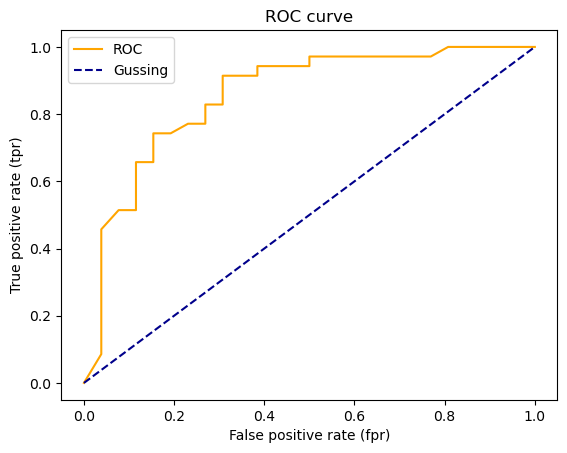

In [94]:
# plot roc curve
import matplotlib.pyplot as plt

def plot_roc_curve(fpr,tpr):
    """
    Plots a roc curve given the false positive rate and the true positive rate
    """
    plt.plot(fpr,tpr,color = "orange",label ="ROC")

    plt.plot([0,1],(0,1), color="darkblue",linestyle ="--",label ="Gussing")

    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("ROC curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr,tpr)

In [95]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_probs_positive)

0.8554945054945055

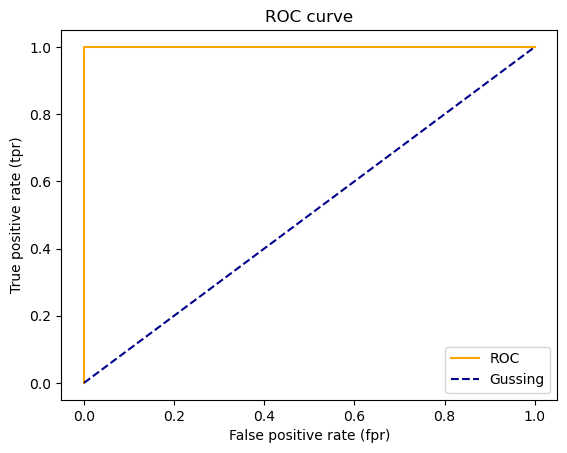

In [96]:
# plot perfect ROC curve
fpr,tpr,thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr,tpr)


#### Confusion matrix
Quick wat to compare the labels a model predicts and the actual labels it was supposed to predict

In essence, giving you an idea of where the model is getting confused

In [97]:
from sklearn.metrics import confusion_matrix
y_preds = model.predict(X_test)

confusion_matrix(y_test,y_preds)

array([[19,  7],
       [ 6, 29]], dtype=int64)

In [98]:
pd.crosstab(y_test,
            y_preds,
            rownames=['actual labels'],
            colnames=['Predicted labels'])

Predicted labels,0,1
actual labels,,
0,19,7
1,6,29


<table>
    <tr>
        <td>True positive</td>
        <td>False negative</td>
    </tr>
     <tr>
        <td>False positive</td>
        <td>True negative</td>
    </tr>
</table>

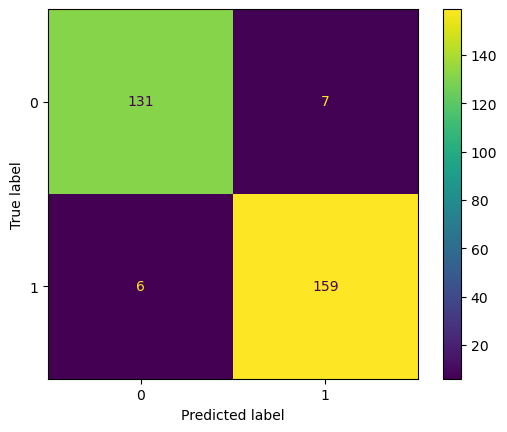

In [99]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model,X,y);

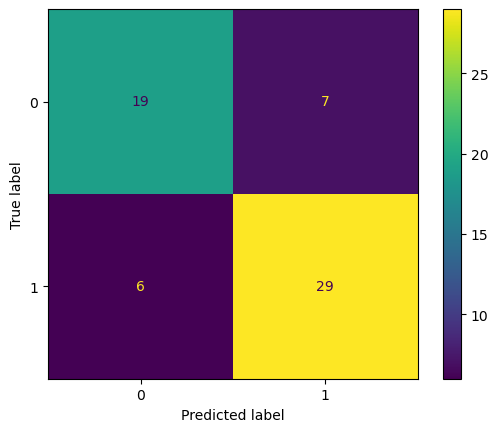

In [100]:
ConfusionMatrixDisplay.from_predictions(y_true = y_test,y_pred = y_preds);

<b> classification report</b>

In [101]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.76      0.73      0.75        26
           1       0.81      0.83      0.82        35

    accuracy                           0.79        61
   macro avg       0.78      0.78      0.78        61
weighted avg       0.79      0.79      0.79        61



In [102]:
# Where precision and recall become valuable
disease_true = np.zeros(10000)

disease_true[0] = 1 # only one positive case

disease_preds = np.zeros(10000)

pd.DataFrame(classification_report(
                                    disease_true,
                                    disease_preds,
                                    output_dict = True,
                                    zero_division=1
                                    ))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,1.0,0.9999,0.999950,0.99990
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


### 4.2.2. Evaluate regression model

1. ${R^2}$ or coefficient of determination
2. Mean absolute error (MAE)
3. Mean squared error (MSE)

$
{R^2}
$ : compares the predctions to the mean of the targets. Values can range from - infinite to 1.0 as highest score possible 

In [103]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop('target',axis =1)
y = housing_df['target']

X_train, X_test, y_train, y_test = tts (X,y,test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor()

In [104]:
model.score(X_test,y_test)

0.8065734772187598

In [105]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [106]:
y_preds = model.predict(X_test)
y_preds

array([0.49384  , 0.75494  , 4.9285964, ..., 4.8363785, 0.71782  ,
       1.67901  ])

In [107]:
from sklearn.metrics import r2_score

## if the model predicted all the targets as the mean , it will get 0.0

y_test_mean = np.full(len(y_test),y_test.mean())

y_test_mean

array([2.0550031, 2.0550031, 2.0550031, ..., 2.0550031, 2.0550031,
       2.0550031])

In [108]:
r2_score(y_test,y_test_mean)

0.0

In [109]:
# Highest score is 1.0
r2_score(y_test,y_test)

1.0

In [110]:
r2_score(y_test,y_preds)

0.8065734772187598

**Mean abosulte error (MAE)**

MAE is the average of the absolute difference between predictions and actual values.

It gives you an idea of how wrong your model predictions are

In [111]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test,y_preds)

print(f'On averge, each value of our predictions is plus / minus {mae:0.2f} the actual value')

On averge, each value of our predictions is plus / minus 0.33 the actual value


In [112]:
df = pd.DataFrame(
    data={
        "predicted values": y_preds,
        "actual values": y_test
    })
df["differences"] = df["predicted values"] - df["actual values"]

df.head(10)

,predicted values,actual values,differences
20046,0.493840,0.47700,0.016840
3024,0.754940,0.45800,0.296940
15663,4.928596,5.00001,-0.071414
20484,2.543160,2.18600,0.357160
9814,2.331760,2.78000,-0.448240
13311,1.652530,1.58700,0.065530
7113,2.343230,1.98200,0.361230
7668,1.661820,1.57500,0.086820
18246,2.474890,3.40000,-0.925110
5723,4.834478,4.46600,0.368478


In [113]:
np.abs(df['differences']).mean(), mae

(0.32659871732073664, 0.32659871732073664)

**Mean Squared error (MSE)**

MSE is the Square of the errors between actual and predicted values

In [114]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test,y_preds)
mse

0.2534678520824551

In [115]:
df["squared differences"] = np.square(df['differences'])
df.head()


,predicted values,actual values,differences,squared differences
20046,0.493840,0.47700,0.016840,0.000284
3024,0.754940,0.45800,0.296940,0.088173
15663,4.928596,5.00001,-0.071414,0.005100
20484,2.543160,2.18600,0.357160,0.127563
9814,2.331760,2.78000,-0.448240,0.200919


In [116]:
squared = np.square(df['differences'])
squared.mean()

0.2534678520824551

**4.2.3 Using `scoring()` parameter**

In [117]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

X = heart_disease.drop('target',axis=1)
y = heart_disease['target']

clf = RandomForestClassifier()

X_train,X_test,y_train,y_test = tts(X,y,test_size= 0.2)

clf.fit(X_train,y_train)

RandomForestClassifier()

In [118]:
# acuracy
np.random.seed(42)
cv_acc = cross_val_score(clf ,X ,y , cv=5) 
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [119]:
print(f'the cross validation accuracy is: {cv_acc.mean() * 100:.2f}%')

the cross validation accuracy is: 82.48%


In [120]:
np.random.seed(42)
cv_precision = cross_val_score(clf,X,y,scoring="precision")
cv_precision

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [121]:
print(f'the cross validation precision is: {cv_precision.mean() * 100:.2f}%')

the cross validation precision is: 83.30%


In [122]:
np.random.seed(42)
cv_recall = cross_val_score(clf,X,y,scoring="recall")
cv_recall

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

In [123]:
print(f'the cross validation recall is: {cv_recall.mean() * 100:.2f}%')

the cross validation recall is: 85.45%


In [124]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

X = housing_df.drop('target',axis=1)
y = housing_df['target']

clf = RandomForestRegressor()

X_train,X_test,y_train,y_test = tts(X,y,test_size= 0.2)

clf.fit(X_train,y_train)

RandomForestRegressor()

In [125]:
np.random.seed(42)
cv_r2 = cross_val_score(clf,X,y,scoring = None)
cv_r2

array([0.51682388, 0.70279716, 0.74197717, 0.61638204, 0.68243183])

In [126]:
np.mean(cv_r2)

0.6520824166120266

In [127]:
# Mean absolute error
cv_mse = cross_val_score(clf,X,y,scoring = "neg_mean_squared_error")
np.mean(cv_mse)

-0.43099502243995547

In [128]:
cv_mse

array([-0.51296289, -0.35070541, -0.37298376, -0.44907837, -0.46924468])

In [129]:
# Mean absolute error
cv_mae = cross_val_score(clf,X,y,scoring = "neg_mean_absolute_error")
np.mean(cv_mae)

-0.46446241455910864

In [130]:
cv_mae

array([-0.54535682, -0.405814  , -0.43474105, -0.46311862, -0.47328158])

## 4.3 Using different evaluation metrics as scikit learn functions 

`sclearn.metrics`

In [131]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

X = heart_disease.drop('target',axis=1)
y = heart_disease['target']

model = RandomForestClassifier()

X_train,X_test,y_train,y_test = tts(X,y,test_size= 0.2)

model.fit(X_train,y_train)

y_preds = model.predict(X_test)

print('Classifier metrics on the test set')
print(f'Accuracy: {accuracy_score(y_test,y_preds)*100:.2f}%')
print(f'precision: {precision_score(y_test,y_preds)*100:.2f}%')
print(f'recall: {recall_score(y_test,y_preds)*100:.2f}%')
print(f'f1: {f1_score(y_test,y_preds)*100:.2f}%')

Classifier metrics on the test set
Accuracy: 85.25%
precision: 84.85%
recall: 87.50%
f1: 86.15%


In [132]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

X = housing_df.drop('target',axis=1)
y = housing_df['target']

model = RandomForestRegressor()

X_train,X_test,y_train,y_test = tts(X,y,test_size= 0.2)

model.fit(X_train,y_train)
y_preds = model.predict(X_test)

print('Regression metrics on the test set')
print(f'r2: {r2_score(y_test,y_preds)*100:.2f}%')
print(f'mean_absolute_error: {mean_absolute_error(y_test,y_preds)*100:.2f}%')
print(f'mean_squared_error: {mean_squared_error(y_test,y_preds)*100:.2f}%')


Regression metrics on the test set
r2: 80.66%
mean_absolute_error: 32.66%
mean_squared_error: 25.35%


## 5. Improving a model

first predictions = baseline predictions 

first model = baseline model

from data perspective
* Collect more data?
* Improve our data

from model perspective
* better model we could use?
* improve the current model

Parameters : patternes in the data for the model to find

hyperparameters : settings that you can adjust


In [133]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

#### 5.1 Tuning hyperparameters by hand


Hyperparameters to adjust:

* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`

In [203]:
def evaluate_preds(y_true, y_preds):
    """
        Performs evaluation comparison on y_true labes vs y_pred labels
    """
    accuracy = accuracy_score(y_true,y_preds)
    precision = precision_score(y_true,y_preds)
    recall = recall_score(y_true,y_preds)
    f1 = f1_score(y_true,y_preds)
    metric_dict = {
        "accuracy": round(accuracy,2),
        "precision": round(precision,2),
        "recall": round(recall,2),
        "f1": round(f1,2),
    }
    print(f'accuracy: {accuracy * 100:.2f}%')
    print(f'precision: {precision * 100:.2f}')
    print(f'recall: {recall * 100:.2f}')
    print(f'f1: {f1 * 100:.2f}')
    return metric_dict

In [204]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# shuffle the data
heart_disease_shuffled = heart_disease.sample(frac = 1)

# split into X & y
X = heart_disease_shuffled.drop('target', axis=1)
y = heart_disease_shuffled['target']

# split the data into train , validation and test
train_split = round(0.7 * len(heart_disease_shuffled)) # 70% of data
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled)) # 15% of data

X_train, y_train = X[:train_split] , y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:] , y[valid_split:]

len(X_train), len(X_valid), len(X_test)

model = RandomForestClassifier()

# train the model 
model.fit(X_train,y_train)

# Make predictions
y_preds = model.predict(X_valid)

# Evaluate the classifier on the validation set
baseline_metrics = evaluate_preds(y_valid,y_preds)
baseline_metrics

accuracy: 82.22%
precision: 81.48
recall: 88.00
f1: 84.62


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

#### 5.2 By randomized and grid search CV

#### baseline model

In [213]:
np.random.seed(42)

heart_disease_df = pd.read_csv("../data/heart-disease.csv")

# Split into X & y
X = heart_disease_df.drop("target", axis =1)
y = heart_disease_df["target"]

# Split into train & test

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2)

# Make & fit baseline model
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make baseline predictions
y_preds = clf.predict(X_test)

# Evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_test, y_preds)

accuracy: 85.25%
precision: 84.85
recall: 87.50
f1: 86.15


## RandomizedSearchCV
Find hyperparameters with [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html).

**Note:** Although best parameters are found on different splits of `X_train` and `y_train`, because `refit=True`, once the best parameters are found, they are refit to the entire set of `X_train` and `y_train`. See the [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html) and [cross-validation documentation](https://scikit-learn.org/stable/modules/cross_validation.html) for more.

In [214]:
from sklearn.model_selection import RandomizedSearchCV

# Setup the parameters grid
grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["log2", "sqrt",None],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid, 
                            n_iter=10, # number of models to try
                            cv=5,
                            verbose=2,
                            random_state=42, # set random_state to 42 for reproducibility
                            refit=True) # set refit=True (default) to refit the best model on the full dataset 

# Fit the RandomizedSearchCV version of clf
rs_clf.fit(X_train, y_train) # 'rs' is short for RandomizedSearch

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   0.7s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   0.8s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; 

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['log2', 'sqrt', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   random_state=42, verbose=2)

In [215]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': None,
 'max_depth': 5}

In [217]:
# Evaluate RandomizedSearch model
rs_y_preds = rs_clf.predict(X_test)

# Evaluate the classifier on validation set
rs_metrics = evaluate_preds(y_test, rs_y_preds)

accuracy: 85.25%
precision: 84.85
recall: 87.50
f1: 86.15


## GridSearchCV
Find best hyperparameters using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

**Note:** Although best parameters are found on different splits of `X_train` and `y_train`, because `refit=True`, once the best parameters are found, they are refit to the entire set of `X_train` and `y_train`. See the [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and [cross-validation documentation](https://scikit-learn.org/stable/modules/cross_validation.html) for more.

In [222]:
from sklearn.model_selection import GridSearchCV

# Setup grid-2 (refined version of grid)
grid_2 = {'n_estimators': [50, 100, 200],
          'max_depth': [30, None],
        "max_features": ["log2", "sqrt",None],
          'min_samples_split': [2],
          'min_samples_leaf': [1, 2, 4]}

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

# Setup GridSearchCV
gs_clf = GridSearchCV(estimator=clf,
                      param_grid=grid_2, 
                      cv=5,
                      verbose=2,
                      refit=True) # set refit=True (default) to refit the best model on the full dataset

# Fit the GridSearchCV version of clf
gs_clf.fit(X_train, y_train) # 'gs' is short for GridSearch

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; to

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [30, None],
                         'max_features': ['log2', 'sqrt', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [223]:
# Evaluate GridSearchCV model
gs_y_preds = gs_clf.predict(X_test)

# Evaluate the classifier on validation set
gs_metrics = evaluate_preds(y_test, gs_y_preds)


accuracy: 88.52%
precision: 87.88
recall: 90.62
f1: 89.23


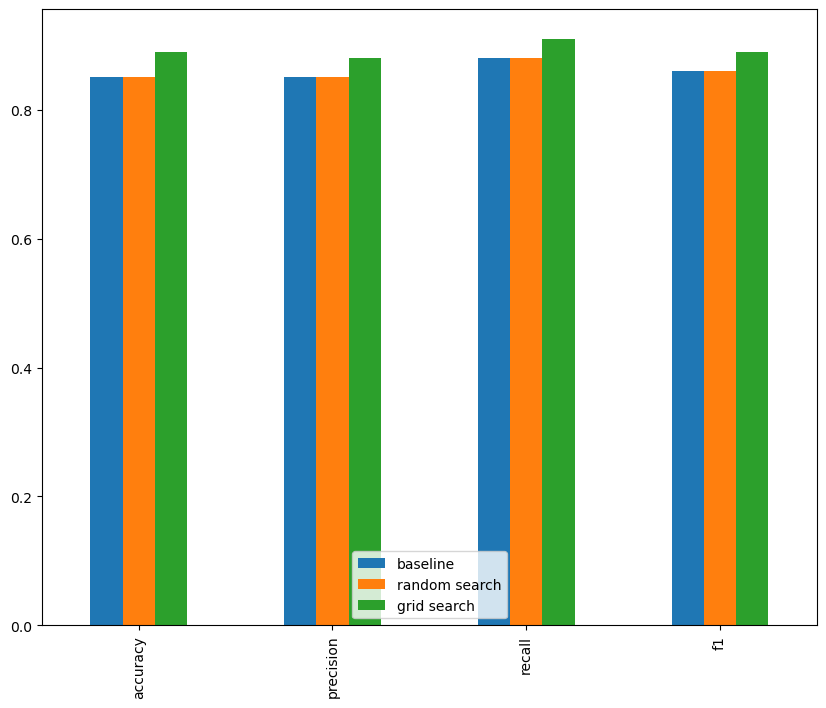

In [224]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                                "random search": rs_metrics,
                                "grid search": gs_metrics})

compare_metrics.plot.bar(figsize=(10, 8));

# GRID SEARCH IS KING

## 6. Saving and loading trained machine learning models

1. With python `pickle`
2. with `joblib`


**Pickle**

In [225]:
import pickle

# Save the existing model to file 
pickle.dump(gs_clf,open('forest_model.pkl','wb'))

In [226]:
# load a saved model 
loaded_pickle_model = pickle.load(open('forest_model.pkl','rb'))

In [227]:
pickle_y_preds = loaded_pickle_model.predict(X_test)

In [229]:
evaluate_preds(y_test,pickle_y_preds)

accuracy: 88.52%
precision: 87.88
recall: 90.62
f1: 89.23


{'accuracy': 0.89, 'precision': 0.88, 'recall': 0.91, 'f1': 0.89}

In [230]:
pickle_y_preds == gs_y_preds

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

**Joblib**

In [231]:
from joblib import dump, load

# save the model 
dump(gs_clf,'joblib-model.joblib')

['joblib-model.joblib']

In [232]:
# load joblib model
loaded_joblib_model = load('joblib-model.joblib')

In [233]:
joblib_y_preds = loaded_joblib_model.predict(X_test)
evaluate_preds(y_test,joblib_y_preds)

accuracy: 88.52%
precision: 87.88
recall: 90.62
f1: 89.23


{'accuracy': 0.89, 'precision': 0.88, 'recall': 0.91, 'f1': 0.89}

In [235]:
joblib_y_preds == pickle_y_preds 

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

## 7. Put it all together

In [237]:
data = pd.read_csv('../data/car-sales-extended-missing-data.csv')
data.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [241]:
# Getting data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Setup random seed
import numpy as np
np.random.seed(42)

# Import data and drop the rows with missing labels
data = pd.read_csv("../data/car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"], inplace=True)

# Define different features and transformer pipelines
categorical_features = ["Make", "Colour"]
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))])

door_feature = ["Doors"]
door_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value=4))])

numeric_features = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean"))
])

# Setup preprocessing steps (fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", categorical_transformer, categorical_features),
        ("door", door_transformer, door_feature),
        ("num", numeric_transformer, numeric_features)])

# Create a preprocessing and modelling pipeline
model = Pipeline(steps=[("preprocessor", preprocessor),
                        ("model", RandomForestRegressor(n_jobs=-1))])

# Split data
X = data.drop("Price", axis=1)
y = data["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit and score the model
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.22188417408787875

It is also possible to use `GridSearchCV` or `RandomizedSearchCV` winth your pipelinse

In [242]:
# Using grid search with pipeline
pipe_grid = {
    "preprocessor__num__imputer__strategy": ["mean", "median"], # note the double underscore after each prefix "preprocessor__"
    "model__n_estimators": [100, 1000],
    "model__max_depth": [None, 5],
    "model__max_features": ["sqrt"],
    "model__min_samples_split": [2, 4]
}

gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2)
gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_sampl

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value=4,
                                                                                                        strategy='constant'))]),
                                                                         ['Doors']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer())]),
                                                                         ['Odometer '
                                                                          '(KM)'])])),
                                       ('model',
                                        RandomForestRegressor(n_jobs=-1))]),
             param_grid={'model__max_depth': [None, 5],
                         'model__max_features': ['sqrt'],
                         'model__min_samples_split': [2, 4],
                         'model__n_estimators': [100, 1000],
                         'preprocessor__num__imputer__strategy': ['mean',
                                                                  'median']},
             verbose=2)

In [243]:
gs_model.score(X_test, y_test)


0.2848784564026805